In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import mplcyberpunk

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.style.use("cyberpunk")

### Создаем случайную выборку

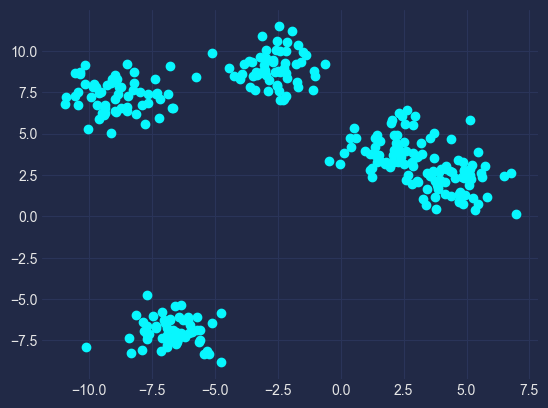

In [4]:
X,y = make_blobs(n_samples=300, random_state=42, centers=5)
plt.scatter(X[:,0], X[:,1])

## KMeans

### Выбираем оптимальное кол-во кластеров

In [5]:
criteries = []
for k in range(2, 10):
    kmeansModel=KMeans(n_clusters=k, random_state=3)
    kmeansModel.fit(X)
    criteries.append(kmeansModel.inertia_)

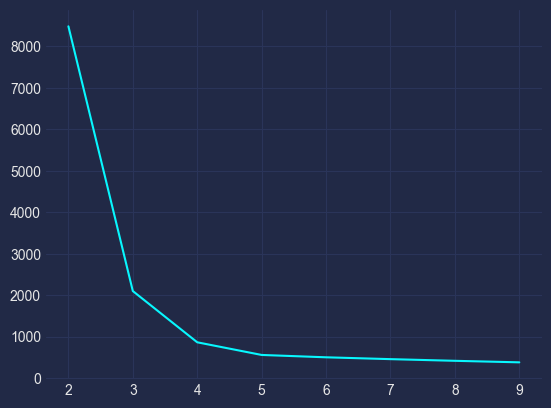

In [6]:
plt.plot(range(2, 10), criteries)

Оптимальное кол-во кластеров - 3

### Проверяем

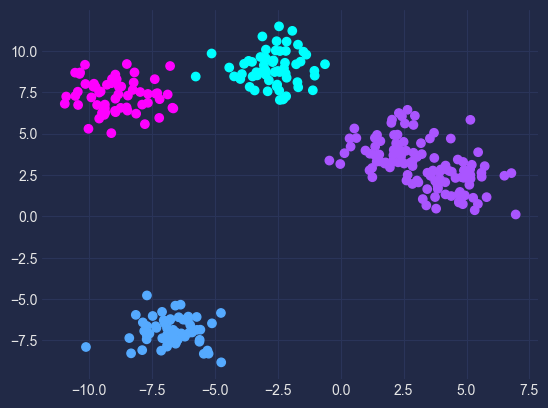

In [24]:
kmeansModel=KMeans(n_clusters=4, random_state=0)
kmeansModel.fit(X)
labels = kmeansModel.labels_
plt.scatter(X[:,0], X[:,1], c=labels)

## DBSCAN

[ 0  1  0  1  0  2  1  3  2  1  1  0  1  0  1  0  1  1  1  0  0  1  0  1
  1  0  3  1  1  3  2  1  1  2  3  1  1  1  2  1  0  1  3  2  1  2  0  3
  1  3  2  1  3  2  0  2  1  0  2  3  0  2  1  1  3  1  3  3  3  3  1  3
  2  1  2  0  2  2  1  0  3  0  0  1  0  3  2  1  1  1  1  1  0  1  0  0
  1  2  1  1  2  2  1  3  0  0  0 -1  0  1  2  1  1  1  0  0  0  3  2  2
  2  3  2  2  0  3  1  1  2  0  1  2  1  0  0  0  0  1  3  1  0  2  0  1
  1  0  1  3  1  3  1  3  3  1  0  1  3  2  0  1  2  2  1  1  0  2  1  1
  1  1  3  0  1  1  0  1  2  1  3  3  2  2  1  3  3  1  0  2  3  1  1  3
  0  3  3  2  2  3  1  1  2  3  1  1  2  0  0  3  3  0  3  2  1  3  0  1
  2  2  3  1  2  2  1  2  1  1  2  1  2  1  2  1  1  3  1  1  1  1  1  0
  2  1  3  1  3  2  1  1  3  3  1  1  2  3  2  1  3  1  3  1 -1  0  1  1
  1  0  1  1  3  1  2  3  3  0  0  2  1  1  1  1  2  0  0  1  1  3  3  3
  1  1  2  1  3  2  0  2  3  0  1  0]


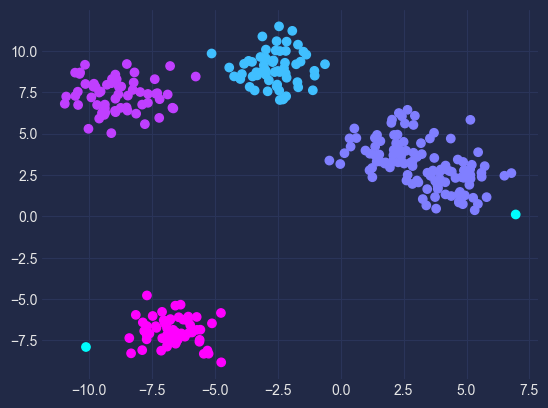

In [8]:
clustering = DBSCAN(eps=1.4, min_samples=2).fit_predict(X)
print(clustering)
plt.scatter(X[:,0], X[:,1], c=clustering);

# Загруженный датасет

In [9]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df = df.drop(columns = ['CustomerID'])
df.Gender = df.Gender.apply(lambda s: 0 if s=='Female' else 1)

In [11]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [12]:
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(df)
df

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [13]:
from sklearn.manifold import TSNE
df_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3, random_state=22).fit_transform(df)

df_embedded

array([[ 1.06389751e+01,  1.73919868e+01],
       [ 1.13838606e+01,  2.13872070e+01],
       [-6.77285614e+01, -9.27317524e+00],
       [ 1.75339115e+00,  5.74841881e+01],
       [-5.99742470e+01, -5.66407394e+00],
       [ 2.33003187e+00,  5.69556694e+01],
       [-6.70158386e+01, -1.03838415e+01],
       [-2.47710109e+00,  5.92615891e+01],
       [-1.31837893e+01,  2.27943497e+01],
       [ 3.19512773e+00,  5.92977791e+01],
       [-1.38938341e+01,  2.31330147e+01],
       [-1.38589799e+00,  6.41913986e+01],
       [-6.49170761e+01, -1.51117077e+01],
       [ 2.48792267e+00,  5.80491867e+01],
       [ 4.81906509e+00,  1.12875729e+01],
       [ 1.06554775e+01,  2.11291790e+01],
       [-6.01253204e+01, -6.25528717e+00],
       [ 1.04854755e+01,  1.91066113e+01],
       [-2.52710491e-01,  7.64115095e+00],
       [-1.65000415e+00,  6.44242020e+01],
       [ 5.11360073e+00,  1.17038031e+01],
       [ 9.48048687e+00,  2.07823219e+01],
       [-6.60341110e+01, -1.21050224e+01],
       [ 7.

In [14]:
criteries = []
for k in range(2,10):
    kmeansModel=KMeans(n_clusters=k, random_state=3)
    kmeansModel.fit(df_embedded)
    criteries.append(kmeansModel.inertia_)

In [15]:
print(criteries)

[258008.359375, 144951.015625, 110412.5, 83199.4375, 70088.4921875, 51851.57421875, 39869.83203125, 28909.68359375]


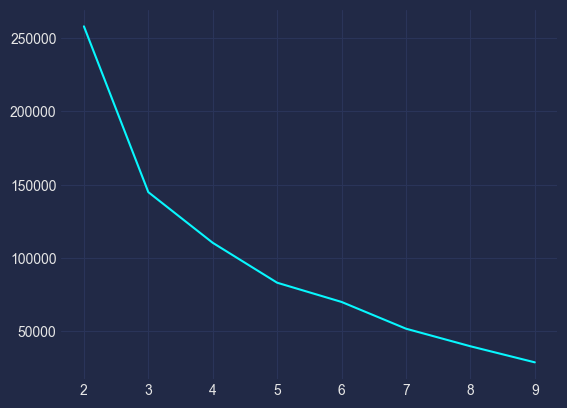

In [16]:
plt.plot(range(2,10), criteries)

Локоть  = 6

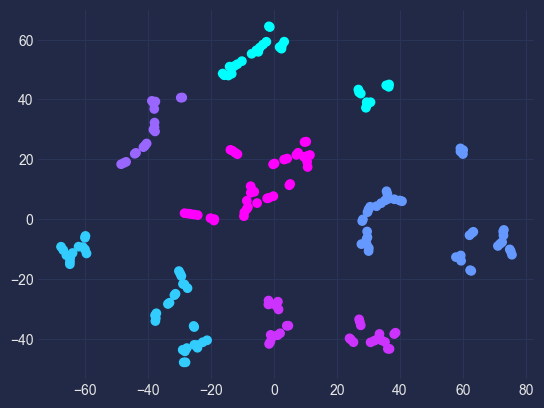

In [17]:
kmeansModel=KMeans(n_clusters=6, random_state=0)
kmeansModel.fit(df_embedded)
labels = kmeansModel.labels_
plt.scatter(df_embedded[:,0], df_embedded[:,1], c=labels)

In [18]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
stop_value = df_embedded.shape[0]
for i_clusters in range(2, stop_value, 3):
    clustering = KMeans(n_clusters=i_clusters)
    labels = clustering.fit_predict(df_embedded)
    silhouette_scores.append(silhouette_score(df_embedded, labels))

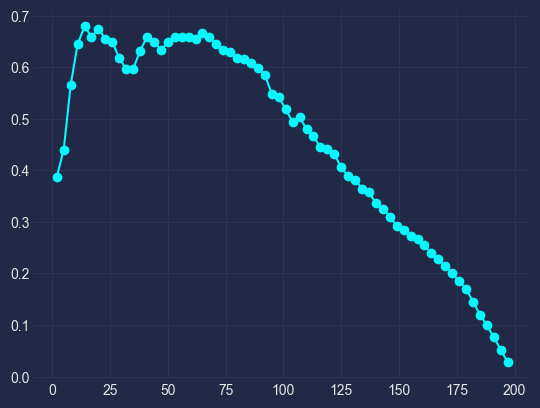

In [19]:
plt.plot(range(2, stop_value, 3), silhouette_scores, marker='o')


Лучшее кол-во кластеров = 17

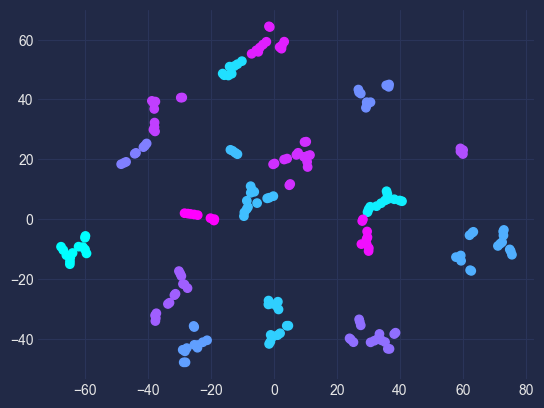

In [20]:
kmeansModel=KMeans(n_clusters=17, random_state=0)
kmeansModel.fit(df_embedded)
labels = kmeansModel.labels_
plt.scatter(df_embedded[:,0], df_embedded[:,1], c=labels)

## DBscan

In [21]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
stop_value = df_embedded.shape[0]
for i_clusters in range(2, 20):
    clustering =DBSCAN(eps=i_clusters, min_samples=2)
    labels = clustering.fit_predict(df_embedded)
    silhouette_scores.append(silhouette_score(df_embedded, labels))

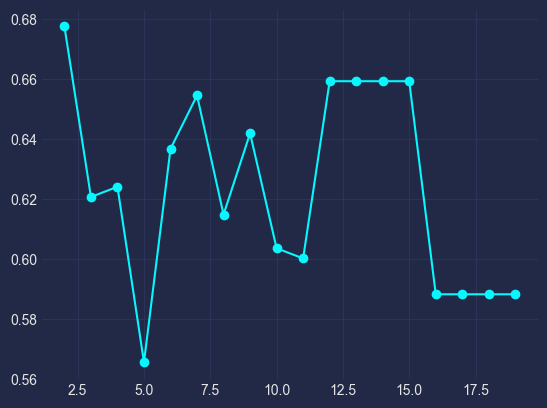

In [22]:
plt.plot(range(2, 20), silhouette_scores, marker='o')

Best eps - 8

[ 0  0  1  2  1  2  1  2  3  2  3  2  1  2  0  0  1  0  0  2  0  0  1  0
  1  0  1  0  1  2  3  2  3  0  1  2  1  2  1  2  4  0  0  2  1  2  4  2
  2  2  4  0  2  0  4  0  4  5  2  0  5  6  4  4  0  6  7  4  6  2  5  7
  4  4  0  6  7  0  8  7  0  0  5  7  8  0  4  8  9  7  4  6  0  8  8  6
  7  8  0  6  8  7  5  6  0  8  4  0  5  5  5  8  8  6  8  8  4  7  7  7
  6  8  9 10  8 11 12 10 12 13 12 13  8 11 14 11 15 13 14 11 15 10  8 11
 14 10 12 11 15 10 12 10 15 11 15 11 12 11 12 11  7 11 14 11 12 11 12 11
 15 13 12 13 12 10 15 11 12 13 12 10 15 11 12 11 15 10 15 13 15 11 15 11
 12 11 15 11 15 13 12 13]


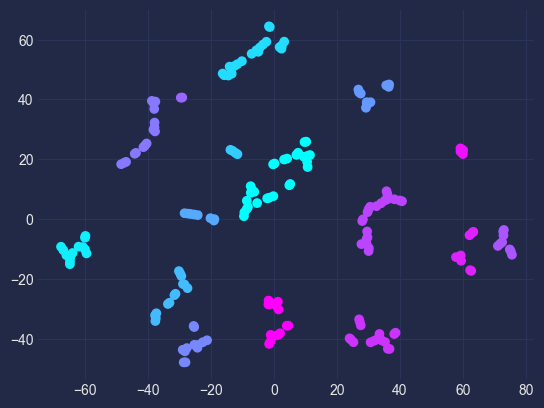

In [23]:
clustering = DBSCAN(eps=8, min_samples=2).fit_predict(df_embedded)
print(clustering)
plt.scatter(df_embedded[:, 0], df_embedded[:, 1], c=clustering);